# Load data

In [1]:
import pandas as pd

# Load data.
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [2]:
# Split out labels and data.
labels = train.label
train.drop('label', axis=1, inplace=True)

In [3]:
# Normalize data from 0-255 into 0-1.
train = train / 255.0
test = test / 255.0

In [4]:
# Reshape from 1D array of 784 into a '3D' array of 28x28x1. Keras required the extra channel which represents colors (in our case 1, but RGB would be 3).
train = train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

# Prepare data

In [5]:
# One-hot the labels.
from keras.utils import to_categorical
labels = to_categorical(labels, num_classes=10)

Using TensorFlow backend.


# Prepare model

In [6]:
# Model.
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(28, 28, 1), padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=2, activation='relu'))
    #
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    #
    return model

# Training

In [7]:
from keras.optimizers import SGD, Adam
#for lr in [0.001]:
#    print('\n\nTesting model with learning rate: %f\n'%lr )
#    inst = get_model()
#    opt = Adam(lr=lr)
#    inst.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#    inst.fit(train, labels, validation_split=0.2, epochs=2, batch_size=10)

# Train.
model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_res = model.fit(train, labels, validation_split=0.1, epochs=10)

W0711 10:05:20.090687 4490180032 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 10:05:20.107321 4490180032 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 10:05:20.109707 4490180032 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 10:05:20.130816 4490180032 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0711 10:05:20.181478 4490180032 deprecation_wrapper.py:119] From /usr/loca

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 16s 431us/step - loss: 0.1741 - acc: 0.9477 - val_loss: 0.0654 - val_acc: 0.9764
Epoch 2/10
37800/37800 [==============================] - 15s 397us/step - loss: 0.0579 - acc: 0.9820 - val_loss: 0.0513 - val_acc: 0.9833
Epoch 3/10
37800/37800 [==============================] - 15s 389us/step - loss: 0.0395 - acc: 0.9879 - val_loss: 0.0496 - val_acc: 0.9838
Epoch 4/10
37800/37800 [==============================] - 15s 388us/step - loss: 0.0303 - acc: 0.9910 - val_loss: 0.0396 - val_acc: 0.9860
Epoch 5/10
37800/37800 [==============================] - 15s 385us/step - loss: 0.0230 - acc: 0.9924 - val_loss: 0.0476 - val_acc: 0.9845
Epoch 6/10
37800/37800 [==============================] - 15s 391us/step - loss: 0.0169 - acc: 0.9943 - val_loss: 0.0491 - val_acc: 0.9812
Epoch 7/10
37800/37800 [==============================] - 15s 395us/step - loss: 0.0152 - acc: 0.9950 - val_loss: 0.0

# Checking

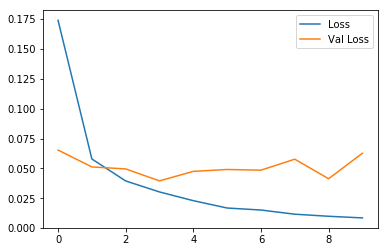

In [8]:
# Plot accuracy.
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_res.history['loss'], label='Loss')
plt.plot(train_res.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

# Predict

In [9]:
preds = model.predict_classes(test)

# Submit

In [10]:
# Predict.
submission = pd.DataFrame({
    'ImageId': range(1, len(test)+1),
    'Label': preds
})
submission.to_csv('./submissions/keras-sub.csv', index=False)
print('Done!')

Done!
